### Perkenalan

```
====================================================================================================================
Milestones

Nama  : Dwi Hastuti
Batch : 024

Milestones 1 ini dibuat guna mengevaluasi pembelajaran pada Hacktiv8 Data Science Fulltime Program khususnya pada Phase 0.

link:
tableau: https://public.tableau.com/shared/75BNK2CPH?:display_count=n&:origin=viz_share_link
https://public.tableau.com/views/Salesstore_17345276814310/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

====================================================================================================================
```

### Identifikasi Masalah

#### Topic

Analisis Perilaku Konsumen Berdasarkan Gender untuk Meningkatkan Strategi Pemasaran

#### Latar belakang

Sebuah perusahaan ingin mengidentifikasi pola pembelian konsumen berdasarkan data yang tersedia. Dengan mengidentifikasi pola ini, perusahaan dapat merancang strategi pemasaran yang lebih terarah, meningkatkan pengalaman pelanggan, dan, pada akhirnya, meningkatkan penjualan produk.

#### SMART

- Spesific: Meningkatkan penjualandengan merancang strategi pemasaran yang disesuaikan dengan preferensi dan perilaku konsumen berdasarkan data pembelian
- Measureable: Meningkatkan frekuensi pembelian produk sebesar 5% dalam 6 bulan ke depan, berdasarkan analisis data historis pembelian.
- Achievable: Memberikan diskon sebesar 10% kepada konsumen yang menggunakan metode pembayaran tertentu, seperti kartu kredit yang bekerja sama dengan perusahaan, untuk meningkatkan penjualan produk.
- Relevan: Strategi ini relevan karena akan memungkinkan perusahaan untuk meningkatkan relevansi produk yang dijual dengan preferensi konsumen, mengurangi potensi kerugian (loss profit)
- Timebound:  Analisis dilakukan pada 4 musim, dengan tujuan untuk merancang strategi pemasaran dalam musim selanjutnya.


#### Problem Statement

Untuk meningkatkan penjualan perusahaan, diperlukan strategi pemasaran yang disesuaikan dengan preferensi dan perilaku konsumen berdasarkan data pembelian historis. Tujuan utama adalah meningkatkan frekuensi pembelian produk sebesar 5% dalam enam bulan ke depan, dengan pemberian diskon sebesar 10% kepada konsumen yang menggunakan metode pembayaran tertentu seperti kartu kredit yang bekerja sama dengan perusahaan. Strategi pemasaran ini relevan karena akan meningkatkan relevansi produk yang dijual, menyesuaikan dengan kebutuhan konsumen, serta mengurangi potensi kerugian (loss profit). Analisis data dilakukan selama empat musim untuk merancang dan menyesuaikan strategi pemasaran yang lebih tepat guna pada musim berikutnya, memastikan strategi yang dapat diimplementasikan dengan sukses dalam jangka waktu yang telah ditentukan.

#### Penjabaran Masalah

1. Siapa konsumen yang lebih cenderung berbelanja berdasarkan jenis kelamin?
2. Apa kategori produk apa yang paling banyak dibeli pada setiap musim?
3. Apakah rata-rata harga yang dibayar oleh konsumen pria berbeda dengan rata-rata harga yang dibayar oleh konsumen wanita?
4. Berapa harga pembelian produk paling sering dilakukan berdasarkan gender?
5. Apakah gender dan berlangganan informasi saling berpengaruh?
6. Metode pembayaran apa yang paling sering digunakan oleh konsumen?
7. Kapan frekuensi pembelian tertinggi terjadi berdasarkan musim?
8. Apakah ada hubungan antara jenis kelamin dan status langganan informasi?

### Data Loading

In [ ]:
#mengimport package
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from scipy import stats
import numpy as np
import plotly.graph_objects as go

In [ ]:
#Load file data dengan Pandas lalu tampilkan data.
#Use pd.read_csv to open the file.

df = pd.read_csv(r'shopping_behavior_updated.csv')
df.loc[25:30]
#financials.iloc[187:209]

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
25,26,18,Male,Hoodie,Clothing,25,Texas,M,Silver,Summer,3.6,Yes,Express,Yes,Yes,14,PayPal,Annually
26,27,38,Male,Jewelry,Accessories,20,Nevada,M,Red,Spring,3.6,Yes,Next Day Air,Yes,Yes,13,Credit Card,Annually
27,28,56,Male,Shorts,Clothing,56,Kentucky,L,Cyan,Summer,5.0,Yes,Next Day Air,Yes,Yes,7,Bank Transfer,Every 3 Months
28,29,54,Male,Handbag,Accessories,94,North Carolina,M,Gray,Fall,4.4,Yes,Free Shipping,Yes,Yes,41,PayPal,Every 3 Months
29,30,31,Male,Dress,Clothing,48,Wyoming,S,Black,Fall,4.1,Yes,Store Pickup,Yes,Yes,14,Credit Card,Weekly
30,31,57,Male,Jewelry,Accessories,31,North Carolina,L,Black,Winter,4.7,Yes,Standard,Yes,Yes,16,Credit Card,Monthly


In [ ]:
#Tampilkan informasi summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
#melihata apakah ada data yang duplikata atau tidak
duplicate = df[df.duplicated()]

print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases


Setelah melakukan data load tidak ditemukan data missing value maupun data yang terduplikat

### Data Cleaning

In [ ]:
#menggubah nama kolom Purchase Amount (USD) menjadi Purchase

data= df.rename(columns={'Purchase Amount (USD)': 'Purchase'})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase                3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
#mengganti tipe data customer_id agar tidak masuk ke perhitungan describe
data['Customer ID'] = data['Customer ID'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   object 
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase                3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
#membuat tabel berdasarkan gender female
data_female = data[data['Gender'] == 'Female']

data_female.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1248 entries, 2652 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             1248 non-null   object 
 1   Age                     1248 non-null   int64  
 2   Gender                  1248 non-null   object 
 3   Item Purchased          1248 non-null   object 
 4   Category                1248 non-null   object 
 5   Purchase                1248 non-null   int64  
 6   Location                1248 non-null   object 
 7   Size                    1248 non-null   object 
 8   Color                   1248 non-null   object 
 9   Season                  1248 non-null   object 
 10  Review Rating           1248 non-null   float64
 11  Subscription Status     1248 non-null   object 
 12  Shipping Type           1248 non-null   object 
 13  Discount Applied        1248 non-null   object 
 14  Promo Code Used         1248 non-null   ob

In [ ]:
#membuat tabel berdasarkan gender male
data_male = data[data['Gender'] == 'Male']
data_male.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2652 entries, 0 to 2651
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             2652 non-null   object 
 1   Age                     2652 non-null   int64  
 2   Gender                  2652 non-null   object 
 3   Item Purchased          2652 non-null   object 
 4   Category                2652 non-null   object 
 5   Purchase                2652 non-null   int64  
 6   Location                2652 non-null   object 
 7   Size                    2652 non-null   object 
 8   Color                   2652 non-null   object 
 9   Season                  2652 non-null   object 
 10  Review Rating           2652 non-null   float64
 11  Subscription Status     2652 non-null   object 
 12  Shipping Type           2652 non-null   object 
 13  Discount Applied        2652 non-null   object 
 14  Promo Code Used         2652 non-null   objec

### Analisis dan perhitungan

#### Cek Outlier

Sebelum melakun penggolahan data lebih lanjut diperlukan melihat apakah data yang akan kita analisis terindikasi dengan outlier apa tidak,outlier adalah data yang secara signifikan berbeda dari pengamatan lainnya dalam kumpulan data. Ini adalah nilai yang sangat tinggi atau rendah dibandingkan dengan mayoritas data, untuk melihat adanya outlier atau tidak dapat menggunakan bloxplot

<Axes: >

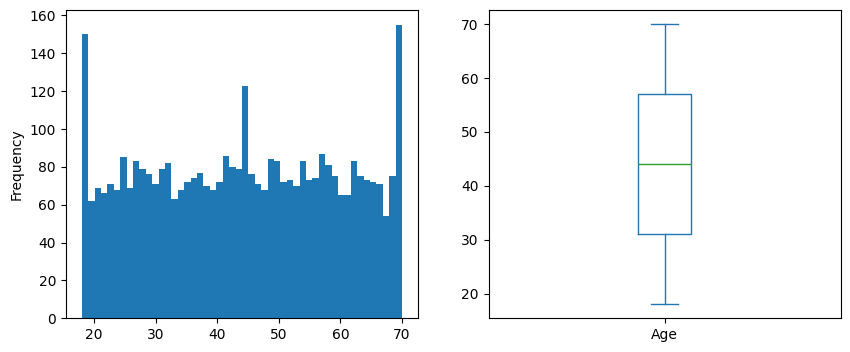

In [ ]:
#cek outlier umur menggunakan bloxplot
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data['Age'].plot(kind='hist',bins=50,ax=ax[0]) #bins data interval di plot
data['Age'].plot(kind='box',ax=ax[1])

<Axes: >

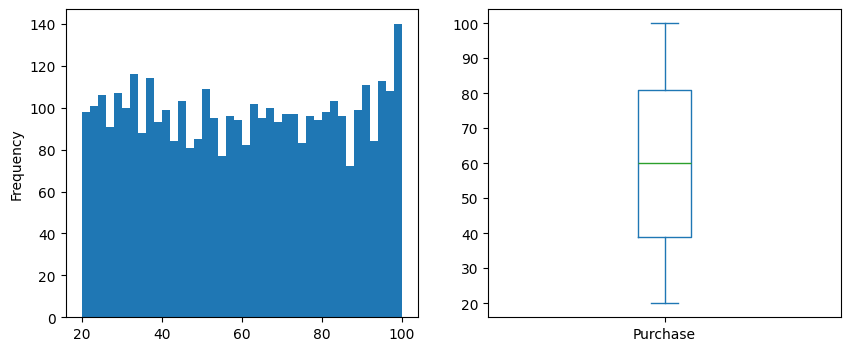

In [ ]:
#cek outlier hrga produk menggunakan boxplot
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data['Purchase'].plot(kind='hist',bins=40,ax=ax[0]) #bins data interval di plot
data['Purchase'].plot(kind='box',ax=ax[1])

<Axes: >

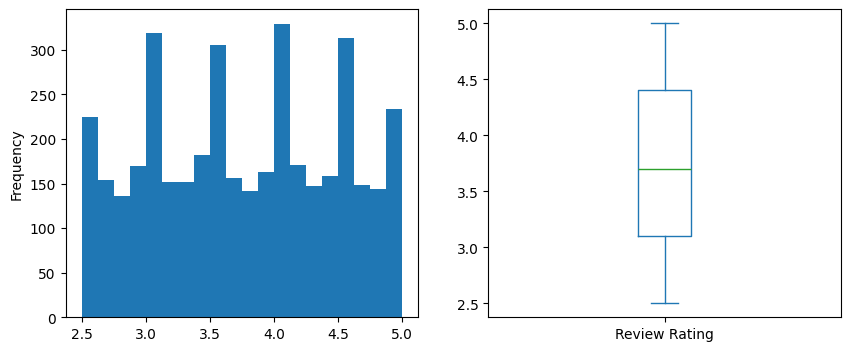

In [ ]:
#cek outlier review produk menggunakan boxplot
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data['Review Rating'].plot(kind='hist',bins=20,ax=ax[0]) #bins data interval di plot
data['Review Rating'].plot(kind='box',ax=ax[1])

##### Outlier berdasarkan gender

<Axes: >

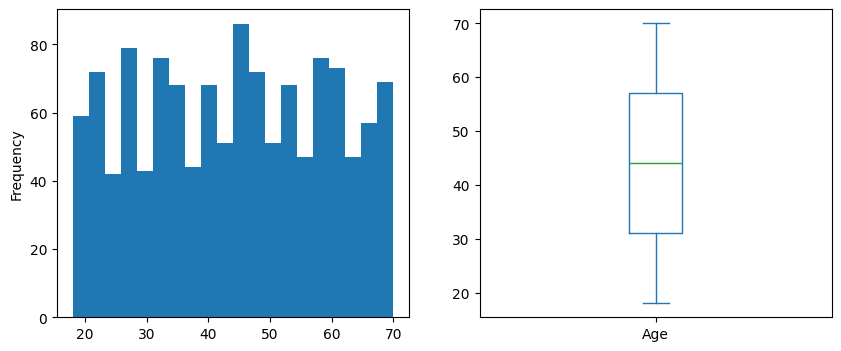

In [ ]:
#cek outlier umur berdasarkan wanita
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data_female['Age'].plot(kind='hist',bins=20,ax=ax[0]) #bins data interval di plot
data_female['Age'].plot(kind='box',ax=ax[1])

<Axes: >

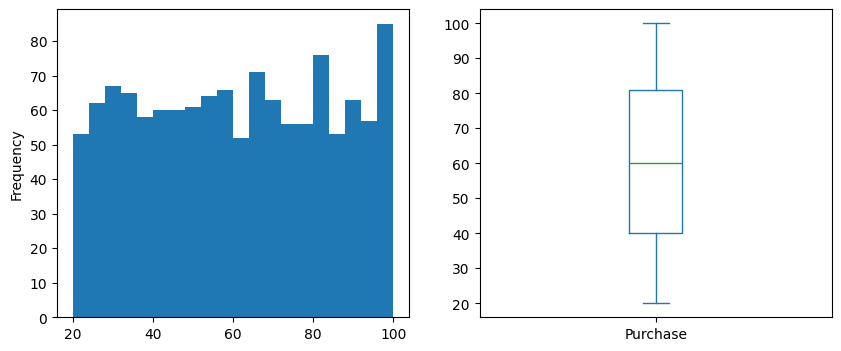

In [ ]:
#cek outlier harga barang berdasarkan wanita
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data_female['Purchase'].plot(kind='hist',bins=20,ax=ax[0]) #bins data interval di plot
data_female['Purchase'].plot(kind='box',ax=ax[1])

<Axes: >

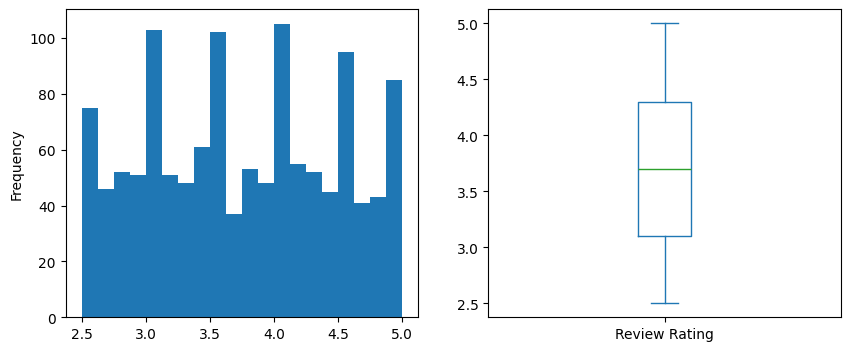

In [ ]:
#cek outlier umur berdasarkan wanita
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data_female['Review Rating'].plot(kind='hist',bins=20,ax=ax[0]) #bins data interval di plot
data_female['Review Rating'].plot(kind='box',ax=ax[1])

<Axes: >

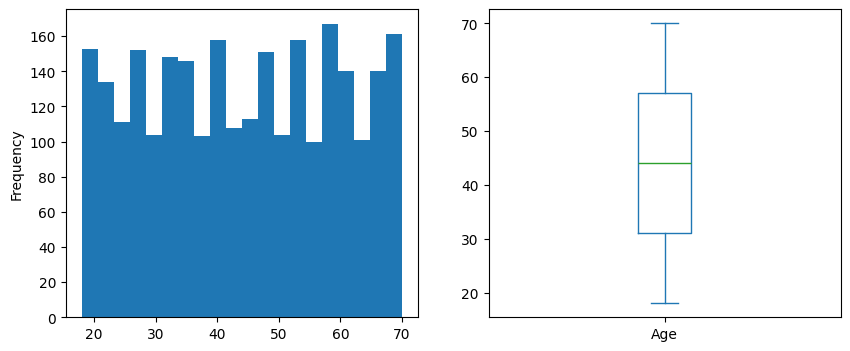

In [ ]:
#cek outlier umur laki-laki
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data_male['Age'].plot(kind='hist',bins=20,ax=ax[0]) #bins data interval di plot
data_male['Age'].plot(kind='box',ax=ax[1])

<Axes: >

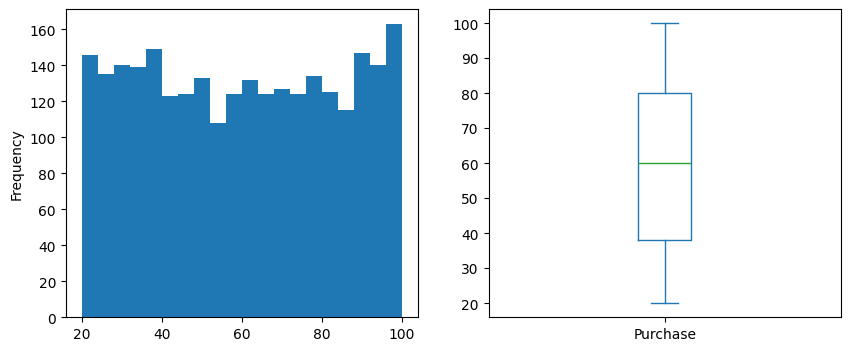

In [ ]:
#cek outlier harga barang berdasarkan wanita
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data_male['Purchase'].plot(kind='hist',bins=20,ax=ax[0]) #bins data interval di plot
data_male['Purchase'].plot(kind='box',ax=ax[1])

<Axes: >

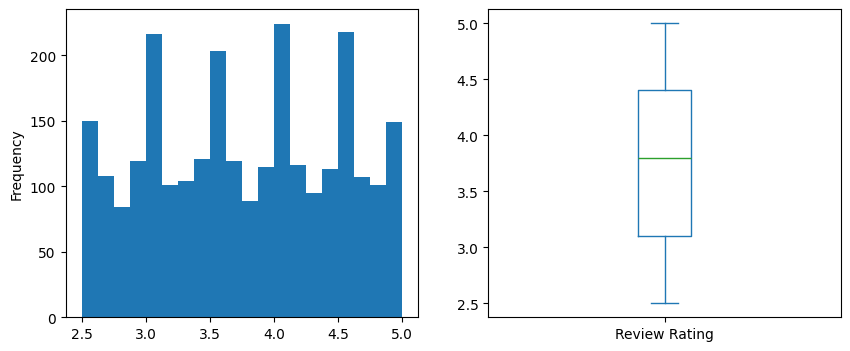

In [ ]:
#cek outlier umur berdasarkan wanita
fig, ax = plt.subplots(ncols=2,figsize=(10,4))

data_male['Review Rating'].plot(kind='hist',bins=20,ax=ax[0]) #bins data interval di plot
data_male['Review Rating'].plot(kind='box',ax=ax[1])

KEsimpulan dari cek outlier adalah: semua data tidak terdapat outlier data tidak memiliki outlier, ini mengindikasikan bahwa data lebih terkonsentrasi di sekitar median.

Measurement of Central Tendency and Dispersion

Perusahaan ingin melihat distibusi sebaran umur, harga pembelian dan rating berdsarkan gender tersebar atau terkonsentrasi di kelompok tertentu.

In [ ]:
#menghitung statistik deksritif untuk wanita

data_female.describe()

,Age,Purchase,Review Rating,Previous Purchases
count,1248.000000,1248.000000,1248.000000,1248.000000
mean,44.007212,60.249199,3.741426,24.596154
std,14.953843,23.420556,0.720625,14.579221
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,40.000000,3.100000,12.000000
50%,44.000000,60.000000,3.700000,24.000000
75%,57.000000,81.000000,4.300000,37.000000
max,70.000000,100.000000,5.000000,50.000000


In [ ]:
#menghitung statistik deksritif untuk pria

data_male.describe()

,Age,Purchase,Review Rating,Previous Purchases
count,2652.000000,2652.000000,2652.000000,2652.000000
mean,44.097285,59.536199,3.753959,25.707014
std,15.328257,23.809976,0.714243,14.373570
min,18.000000,20.000000,2.500000,1.000000
25%,31.000000,38.000000,3.100000,13.750000
50%,44.000000,60.000000,3.800000,26.000000
75%,57.000000,80.000000,4.400000,38.000000
max,70.000000,100.000000,5.000000,50.000000


DAri kedua tabel describe diatas menjelaskan bahwa rata-rata umur wanita dan pria yang berbelanja sekitar 44 tahun, distribusi usia pelanggan relatif seimbang antara pria dan wanita. Rata-rata harga yang dibayar oleh wanita sedikit lebih tinggi dibandingkan dengan pria, tetapi perbedaannya sangat kecil, std yang menunjukan adanya variasi dalam harga yang dibayar oleh wanita dibandingkan pria.Rata-rata rating ulasan untuk pria dan wanita hampir sama, menunjukkan bahwa kualitas produk diulas mungkin tidak tergantung pada gender.

#### Siapa konsumen paling banyak berbelanja berdasarkan gender?

In [ ]:
#visualisasi konsumen berdasarkan gender
#membuat bar chart

# Membuat pie chart dengan menambahkan angka di dalamnya
fig = px.pie(data, names='Gender', color='Gender', color_discrete_map={'Female': 'pink', 'Male': 'blue'})

# Menambahkan angka dan persentase di dalam pie chart
fig.update_traces(textinfo='percent+value', textposition='inside')

# Menambahkan judul pada pie chart
fig.update_layout(title='Distribusi Pelanggan Berdasarkan Gender')

# Menampilkan pie chart
fig.show()

Dari chart diatas menjelaskan bahwa konsumen yang sering melakukan transaksi di store adalah laki-laki dengan persentase sebesar 68% dan wanita 32%

#### Apakah rata-rata harga yang dibayar oleh konsumen pria berbeda dengan rata-rata harga yang dibayar oleh konsumen wanita?

H0: Tidak ada perbedaan rata-rata harga yang dibayar antara konsumen pria dan wanita <br>
H₁: Ada perbedaan rata-rata harga yang dibayar antara konsumen pria dan wanita.



In [ ]:

#mengambil harga yang dibayar oleh pria dan wanita
purchase_male = data_male['Purchase']
purchase_female = data_female['Purchase']

#melakukan Uji t dua sampel untuk menguji apakah rata-rata harga berbeda
t_stat, p_value = stats.ttest_ind(purchase_male, purchase_female)

# Menampilkan hasil Uji t
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.2f}")

# Menetapkan tingkat signifikansi
alpha = 0.05

# Uji Hipotesis
if p_value < alpha:
    print("Rata-rata harga yang dibayar pria berbeda dengan rata-rata harga yang dibayar wanita.")
else:
    print("Tidak ada perbedaan yang signifikan antara rata-rata harga yang dibayar pria dan wanita.")


T-statistic: -0.88, P-value: 0.38
Tidak ada perbedaan yang signifikan antara rata-rata harga yang dibayar pria dan wanita.


Berdasarkan hasil analisis dengan t-statistic sebesar -0.88 dan p-value sebesar 0.38, dapat disimpulkan bahwa tidak ada perbedaan yang signifikan antara rata-rata harga yang dibayar oleh konsumen pria dan wanita. Maka kita akan menganalisis harga yang dibayarkan ketika pembelian produk antara wanita dan pria apakah sama atau tidak berbeda jauh, maka perlu melihat modus dari harga pembelian produk dari wanita dan pria

#### Berapa harga pembelian produk paling sering dilakukan berdasarkan gender?

In [ ]:
#mnecari modus berdasarkan gender

#mencari harga belanjaan yang sering muncul pada data berdasarkan gender
print('Harga pembelian barang belanjaan wanita yang paling sering dibeli adalah USD',data_female['Purchase'].mode().values[0])
print('Harga pembelian barang belanjaan pria yang paling sering dibeli adalah USD',data_male['Purchase'].mode().values[0])


Harga pembelian barang belanjaan wanita yang paling sering dibeli adalah USD 82
Harga pembelian barang belanjaan pria yang paling sering dibeli adalah USD 36


secara statistik, perbedaan harga yang dibayar antara pria dan wanita tidak signifikan. namun, wanita cenderung membeli produk dengan harga yang lebih tinggi ($82),  sedangkan, pria lebih memilih produk dengan harga yang lebih terjangkau ($36).

In [ ]:
#menghitung konsumen berdasarkan gender (berikan narasi kenpa mencari data tersebut)
data['Gender'].value_counts()

Gender
Male      2652
Female    1248
Name: count, dtype: int64

#### Apakah gender dan berlangganan informasi saling berpengaruh?

H₀: Gender dan dan langganan tidak berhubungan <br>
H₁: Gender dan Langganan saling berhubungan.

In [ ]:
# Contingency Table
contingency_table = pd.crosstab(data['Gender'], data['Subscription Status'])

# Melakukan Uji Chi-Square untuk Kemandirian
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Menampilkan hasil uji Chi-Square
print("P-value:", p_value)

# Menghitung Cramer's V
n = contingency_table.sum().sum()  # Jumlah total observasi
min_dimension = min(contingency_table.shape) - 1  # Mengambil dimensi terkecil (baris atau kolom)

cramers_v = np.sqrt(chi2 / (n * min_dimension))

print("Cramer's V:", cramers_v)

# Uji Hipotesis
if p_value < 0.05:
    print("Ada hubungan antara gender dan langganan.")
else:
    print("Tidak ada hubungan antara gender dan langganan.")

# Menafsirkan Cramer's V
if cramers_v < 0.1:
    print("Korelasi sangat lemah atau tidak ada hubungan.")
elif cramers_v < 0.3:
    print("Korelasi lemah.")
elif cramers_v < 0.5:
    print("Korelasi sedang.")
else:
    print("Korelasi kuat.")


P-value: 3.3268630006040623e-149
Cramer's V: 0.4165777557121568
Ada hubungan antara gender dan langganan.
Korelasi sedang.


Ada hubungan yang signifikan antara gender dan langganan informasi, dengan tingkat kekuatan korelasi yang sedang. Ini menunjukkan bahwa gender mempengaruhi kemungkinan seseorang untuk berlangganan informasi, meskipun kekuatan pengaruh tersebut tidak sangat kuat, sekarang kita lihat siapa yang paling banyak berlangganan antara wanita atau pria

In [ ]:
data_female['Subscription Status'].value_counts() #menghitung Subscription Status wanita

Subscription Status
No    1248
Name: count, dtype: int64

In [ ]:
data_male['Subscription Status'].value_counts() #menghitung Subscription Status pria

Subscription Status
No     1599
Yes    1053
Name: count, dtype: int64

Meskipun ada perbedaan dalam jumlah wanita dan pria yang berlangganan informasi, rasio antara jumlah yang berlangganan dan tidak berlangganan sama antara wanita dan pria. Hal ini menunjukkan bahwa gender tidak mempengaruhi secara langsung keputusan untuk berlangganan informasi, karena kedua kelompok memiliki distribusi yang serupa.

Namun, berdasarkan analisis statistik sebelumnya dengan P-value yang sangat kecil, kita tetap bisa menyatakan bahwa secara keseluruhan, ada hubungan signifikan antara gender dan status langganan, meskipun jumlah yang berlangganan antara pria dan wanita adalah sama.

#### Bagaimana hubungan antara pengaplikasian diskon dan gender?

H0 :Gender dan Pengaplikasian Diskon tidak berhubungan<br>
H1 : Gender dan Pengaplikasian Diskon saling berhubungan


In [ ]:

contingency_table = pd.crosstab(data['Gender'], data['Discount Applied'])

# Melakukan Uji Chi-Square
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Menampilkan hasil uji Chi-Square
print("P-value:", p_value)

# Menghitung Cramer's V
n = contingency_table.sum().sum()  # Jumlah total observasi
min_dimension = min(contingency_table.shape) - 1  # Mengambil dimensi terkecil (baris atau kolom)

cramers_v = np.sqrt(chi2 / (n * min_dimension))

print("Cramer's V:", cramers_v)

# Uji Hipotesis
if p_value < 0.05:
    print("Ada hubungan antara gender dan pengaplikasian diskon.")
else:
    print("Tidak ada hubungan antara gender dan pengaplikasian diskon.")

# Menafsirkan Cramer's V
if cramers_v < 0.1:
    print("Korelasi sangat lemah atau tidak ada hubungan.")
elif cramers_v < 0.3:
    print("Korelasi lemah.")
elif cramers_v < 0.5:
    print("Korelasi sedang.")
else:
    print("Korelasi kuat.")


P-value: 1.7645380691667684e-302
Cramer's V: 0.5952679522470415
Ada hubungan antara gender dan pengaplikasian diskon.
Korelasi kuat.


 Ada hubungan yang signifikan dan kuat antara gender dan pengaplikasian diskon. Gender mempengaruhi kemungkinan konsumen menggunakan voucher untuk melkakukan transaksi diskon, dengan kekuatan korelasi yang cukup besar. Mari kita lihat data siapa yang lebih banyak menggunakan voucher diskon

In [ ]:
data_female['Discount Applied'].value_counts() #menghitung voucher diskon yang digunakan oleh wanita

Discount Applied
No    1248
Name: count, dtype: int64

In [ ]:
data_male['Discount Applied'].value_counts() ##menghitung voucher diskon yang digunakan oleh pria

Discount Applied
Yes    1677
No      975
Name: count, dtype: int64

Dari data yang ada, pria lebih sering menggunakan voucher  diskon dibandingkan wanita, karena semua wanita dalam data ini tidak menggunakan voucher diskon. Ada kemungkinan pelanggan yang berlangganan email lebih cenderung memakai voucher diskon dibandingkan dengan yang tidak berlangganan. Karena pihak toko juga memberikan informasi tentang kode promo melalui email

#### Jenis kategori produk apa yang paling banyak diminati perempuan dan laki-laki?

In [ ]:
#jenis kategori yang sering dibeli oleh wanita
data_female['Category'].value_counts()

Category
Clothing       556
Accessories    392
Footwear       199
Outerwear      101
Name: count, dtype: int64

In [ ]:
#jenis kategori yang sering dibeli oleh laki
data_male['Category'].value_counts()

Category
Clothing       1181
Accessories     848
Footwear        400
Outerwear       223
Name: count, dtype: int64

In [ ]:
# Menghitung jumlah kategori produk untuk pria dan wanita
male_category_counts = data_male['Category'].value_counts()
female_category_counts = data_female['Category'].value_counts()

# Menyamakan kategori untuk pria dan wanita agar data bisa dibandingkan
categories = list(set(male_category_counts.index) | set(female_category_counts.index))
male_counts = [male_category_counts.get(category, 0) for category in categories]
female_counts = [female_category_counts.get(category, 0) for category in categories]

# Membuat bar chart
fig = go.Figure(data=[
    go.Bar(name='Male', x=categories, y=male_counts),
    go.Bar(name='Female', x=categories, y=female_counts)
])

# Menambahkan judul dan label
fig.update_layout(
    title='Perbandingan Kategori Produk untuk Pria dan Wanita',
    xaxis_title='Kategori Produk',
    yaxis_title='Jumlah Pembelian',
    barmode='group'  # Menggunakan grup bar chart
)

# Menampilkan plot
fig.show()


Kategori clothing (pakaian) menunjukkan angka pembelian yang sangat tinggi pada kedua kelompok, baik pria maupun wanita. Pada wanita, ada 556 pembelian, sedangkan pada pria, jumlahnya lebih besar, yaitu 1181 pembelian. Ini menunjukkan bahwa pakaian adalah kategori yang sangat populer di kedua kelompok, tetapi lebih dominan di kalangan pria.

#### Kapan frekuensi pembelian tertinggi terjadi berdasarkan musim?

In [ ]:
data_female['Season'].value_counts()


Season
Fall      328
Spring    316
Winter    306
Summer    298
Name: count, dtype: int64

In [ ]:
data_male['Season'].value_counts()

Season
Spring    683
Winter    665
Summer    657
Fall      647
Name: count, dtype: int64

In [ ]:
# Menghitung musim untuk pria dan wanita
male_season_counts = data_male['Season'].value_counts()
female_season_counts = data_female['Season'].value_counts()

# Menyamakan kategori untuk pria dan wanita agar data bisa dibandingkan
categories = list(set(male_season_counts.index) | set(female_season_counts.index))  # Menggabungkan kategori unik
male_counts = [male_season_counts.get(season, 0) for season in categories]
female_counts = [female_season_counts.get(season, 0) for season in categories]

# Membuat bar chart
fig = go.Figure(data=[
    go.Bar(name='Male', x=categories, y=male_counts),
    go.Bar(name='Female', x=categories, y=female_counts)
])

# Menambahkan judul dan label
fig.update_layout(
    title='Perbandingan Pembelian Produk berdasarkan Musim untuk Pria dan Wanita',
    xaxis_title='Musim',
    yaxis_title='Jumlah Pembelian',
    barmode='group'  # Menggunakan grup bar chart
)

# Menampilkan plot
fig.show()


Pria cenderung lebih banyak berbelanja di setiap musim dibandingkan wanita. Pembelian produk oleh pria lebih merata antara musim-musim dengan sedikit perbedaan. Wanita lebih dominan dalam membeli produk pada musim Fall dibandingkan musim lainnya, meskipun jumlah pembelian wanita jauh lebih rendah dibandingkan pria di semua musim.

#### Metode pembayaran apa yang paling sering digunakan oleh konsumen?

In [ ]:
data_female['Payment Method'].value_counts()

Payment Method
Credit Card      223
PayPal           221
Cash             212
Venmo            208
Bank Transfer    203
Debit Card       181
Name: count, dtype: int64

In [ ]:
data_male['Payment Method'].value_counts()

Payment Method
Cash             458
PayPal           456
Debit Card       455
Credit Card      448
Venmo            426
Bank Transfer    409
Name: count, dtype: int64

In [ ]:
# Menghitung jenis pembayaran 
male_payment_counts = data_male['Payment Method'].value_counts()
female_payment_counts = data_female['Payment Method'].value_counts()

# Menyamakan kategori untuk pria dan wanita agar data bisa dibandingkan
categories = list(set(male_payment_counts.index) | set(female_payment_counts.index))  # Menggabungkan kategori unik
male_counts = [male_payment_counts.get(payment, 0) for payment in categories]
female_counts = [female_payment_counts.get(payment, 0) for payment in categories]

# Membuat bar chart
fig = go.Figure(data=[
    go.Bar(name='Male', x=categories, y=male_counts),
    go.Bar(name='Female', x=categories, y=female_counts)
])

# Menambahkan judul dan label
fig.update_layout(
    title='Perbandingan Jenis Pembayaran berdasarkan Pria dan Wanita',
    xaxis_title='Jenis Pembayaran',
    yaxis_title='Total',
    barmode='group'  # Menggunakan grup bar chart
)

# Menampilkan plot
fig.show()


Debit Card menjadi pilihan utama bagi laki-laki (455), tetapi menjadi metode pembayaran paling jarang digunakan oleh perempuan (181). Laki-laki cenderung lebih sering menggunakan metode pembayaran Cash (458) dan PayPal (456), dengan Debit Card (455) dan Credit Card (448) juga cukup populer. Perempuan lebih cenderung menggunakan Credit Card (223) dan PayPal (221), meskipun penggunaan Cash (212) juga masih signifikan.
Venmo lebih banyak digunakan oleh laki-laki (426) dibandingkan perempuan (208). Bank Transfer adalah salah satu metode yang paling jarang digunakan oleh kedua gender, tetapi tetap lebih banyak digunakan oleh laki-laki (409) dibandingkan perempuan (203).

### Kesimpulan

- Dominasi Pria dalam Transaksi Pembelian: Pria lebih dominan dalam melakukan transaksi pembelian dibandingkan wanita.
- Preferensi Kategori Produk: Pakaian sangat populer di kedua kelompok gender, namun lebih dominan di kalangan pria.
- Harga Produk: Wanita lebih cenderung membeli produk dengan harga lebih tinggi, sementara pria memilih produk yang lebih terjangkau.
- Penggunaan Diskon: Pria lebih sering menggunakan diskon dibandingkan wanita.
- Pengaruh Status Langganan Email: Konsumen yang berlangganan email lebih cenderung menggunakan diskon, yang menunjukkan bahwa status langganan email dapat mempengaruhi keputusan konsumen untuk memanfaatkan diskon.


#### Saran untuk Perusahaan

- Meningkatkan Penjualan dari Konsumen Wanita: Perusahaan dapat meningkatkan penjualan dari konsumen wanita dengan memberikan diskon, terutama pada musim Fall. Perusahaan juga dapat menambahkan banner ajakan untuk berlangganan email di halaman website agar konsumen mendapatkan diskon menarik. Selain itu, perusahaan dapat menawarkan produk premium yang menarik bagi konsumen wanita.

- Meningkatkan Penggunaan Metode Pembayaran Tertentu: Perusahaan perlu meningkatkan penggunaan metode pembayaran tertentu untuk menarik lebih banyak pelanggan. Salah satu cara adalah dengan menawarkan diskon atau cashback tambahan bagi pelanggan yang menggunakan metode pembayaran tertentu, seperti kartu kredit yang bekerja sama dengan perusahaan.

- Promosi dan Diskon yang Ditetapkan untuk Pria: Perusahaan harus mempertimbangkan untuk meningkatkan promosi dan diskon yang ditargetkan pada pria. Misalnya, menawarkan diskon lebih besar pada kategori pakaian pria atau menyesuaikan kampanye iklan untuk lebih menarik perhatian pria.

